Este notebook é destinado a repetir o código presente nas aplicações `gaussian`, `upload_plot` e `complex`.

`gaussian` é uma aplicação que recebe dois argumento do usuário, mu ($\mu$) e sigma ($\sigma$), e gera um gráfico da distribuição normal. Começaremos pelo formulário [HTML](https://www.w3schools.com/html/html_basic.asp). Clicando na célula abaixo é possível ver como o formulário foi construído para obter os argumentos.

<h4>Give input:</h4>                                                                                     
                                                                                                         
<form method=post action="">                                                                             
    <label for="mu">mu:</label>                                                                          
    <input type="number" maxlength="100" name="mu" value=0>                                              
    <br>                                                                                                 
    <br>                                                                                                 
    <label for="sigma">sigma:</label>                                                                    
    <input type="number" maxlength="100" name="sigma" value=1>                                           
    <br>                                                                                                 
    <br>                                                                                                 
    <input type=submit value=Compute>                                                                    
</form></p>

Após clicar o botão _Compute_ uma [requisição](https://www.w3schools.com/tags/ref_httpmethods.asp) é submetida pelo cliente (o navegador WEB) utilizando o método _POST_. A aplicação então responde retornando um gráfico que é exibido utilizando os moldes do [Jinga](https://jinja.palletsprojects.com/en/2.11.x/), veja as etiquetas `{}` no arquivo **index.html**.

Para retornar o gráfico `gaussian` importa os módulos seguintes:

In [1]:
import matplotlib.pyplot as plt                                                                          
import numpy as np                                                                                       
import scipy.stats as stats                                                                              
import time                                                                                              
import os

%matplotlib inline # Linha necessária para imprimir os gráficos no notebook

UsageError: unrecognized arguments: # Linha necessária para imprimir os gráficos no notebook


Text(0.5, 1.0, 'mu=0, sigma=1')

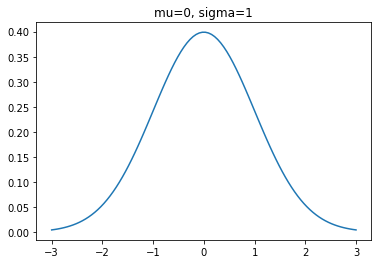

In [2]:
# Argumentos recebidos dos usuários
# Os argumentos são recebidos como
# str e têm que ser transformados em
# float
mu = float('0')                                                                                       
sigma = float('1')                                                                                 

# Gera 100 números dentro de um intervalo
# Execute help(np.linspace) em outra célula
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# Cria o gráfico entre os 100 números
# contra a função densidade de probabilidade (pdf)
# Execute help(stats.norm.pdf) em outra célula
plt.plot(x, stats.norm.pdf(x, mu, sigma))                                                            

# Cria uma sequência de caracteres para o título
plt.title('mu=%g, sigma=%g' % (mu, sigma))

In [3]:
# As linhas
# As linhas abaixo são utilizadas para 
# salvar o gráfico
plotfile = os.path.join('static', str(time.time()) + '.png')                                         

print(plotfile)
#plt.savefig(plotfile)                                                                                

plt.close()                                                                                          

static/1580583024.1683013.png


De maneira similar a aplicação `upload_plot` utiliza o formulário abaixo para submeter uma requisição contendo um arquivo e a aplicação novamente responde com um gráfico.

<title>Upload new File</title>                                             
<h1>Upload new File</h1>                  
<form method=post enctype=multipart/form-data>
  <input type=file name=file>
  <input type=submit value=Upload>
</form>                        

In [4]:
import pandas as pd
import seaborn as sns

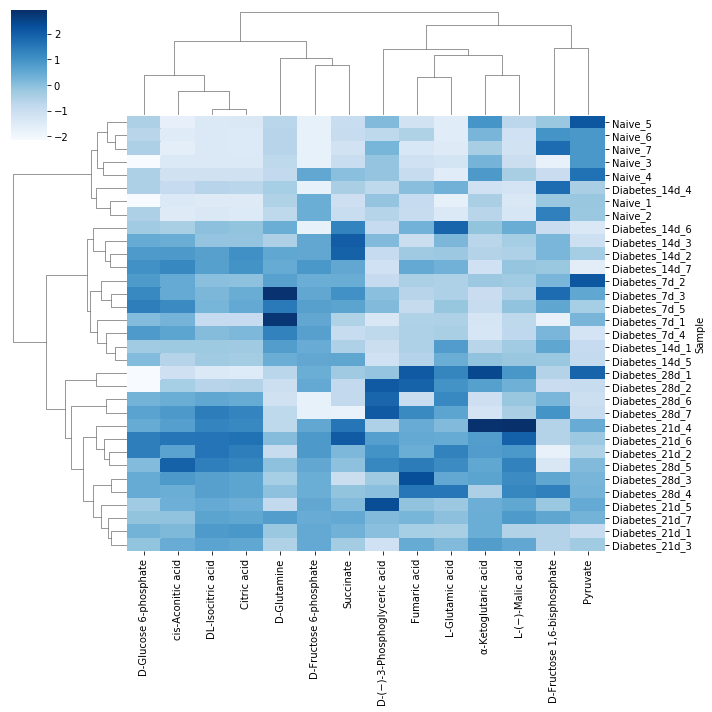

In [5]:
# Ler o arquivo presente
# no computador
df = pd.read_csv('data.tsv', sep='\t', index_col=0)

# scale é um parâmetro que controla
# a mudança da escala dos dados
# mude o valor para False e observe
# as mudanças
scale = True
if scale:
    df = (df-df.mean())/df.std()

# Cria o mapa de calor
# com dendrogramas nas linhas e
# nas colunas, faça
# help(sns.clustermap) e tente
# repetir os mapas sem o dendrograma
# nas linhas
cg = sns.clustermap(df,  method="ward",
                    cmap="Blues")

A aplicação `complex` utiliza a biblioteca (_framework_) [Bootstrap](https://getbootstrap.com/) para controlar a interface e auxiliar na criação de botões e na vizualização dos gráficos e tabelas.

In [6]:
from IPython.core.display import HTML

html = '''<!DOCTYPE html>
<html>

<head>
    <title>Complex</title>
    <script src="https://cdn.jsdelivr.net/npm/vue/dist/vue.js"></script>
    <script src="https://code.jquery.com/jquery-3.3.1.js" integrity="sha256-2Kok7MbOyxpgUVvAk/HJ2jigOSYS2auK4Pfzbm7uH60=" crossorigin="anonymous"></script>
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm" crossorigin="anonymous">
    <script src="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/js/bootstrap.min.js" integrity="sha384-JZR6Spejh4U02d8jOt6vLEHfe/JQGiRRSQQxSfFWpi1MquVdAyjUar5+76PVCmYl" crossorigin="anonymous"></script>
    <link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.6.1/css/all.css" integrity="sha384-gfdkjb5BdAXd+lj+gudLWI+BXq4IuLW5IT+brZEZsLFm++aCMlF1V92rMkPaX4PP" crossorigin="anonymous">
</head>

<body>
    <!-- A grey horizontal navbar that becomes vertical on small screens -->
    <nav class="navbar navbar-expand-sm bg-light navbar-light">
        <a class="navbar-brand" href="">
        </a>

      <!-- Links -->
      <ul class="navbar-nav">
        <li class="nav-item">
          <a class="nav-link" href="/">Homepage</a>
        </li>
        <li class="nav-item">
          <a class="nav-link" href="/graph">Graph</a>
        </li>
        <li class="nav-item">
          <a class="nav-link" href="/table">Table</a>
        </li> 
      </ul> 

    </nav>

   
</body>
 
</html>'''

HTML(html)

A aplicação também utiliza o módulo [_plotly_](https://plot.ly/) para criar gráficos interativos.

In [7]:
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import plot
import plotly                                                            
import json                                                                                              
import numpy as np 

In [13]:
# Ler o arquivo de dados
df = pd.read_csv('complex/Advertising.csv', index_col=0)  

# Ordenar os dados por uma variável específica
df.sort_values(['Sales'], inplace=True)

# Criar uma figura e adicionar
fig = go.Figure()         
for cname in df.columns[:-1]:                     
    fig.add_scatter(x=df[cname], y=df['Sales'], name=cname, mode="markers")
            
fig.update_layout(width=1600, height=800)
fig.write_html('first_figure.html', auto_open=True)